In [1]:
import os
import shutil
#将训练的文件名收集到list，然后用filter分两类
trainFileName= os.listdir('train') 
catInTrain= filter(lambda x:x[:3] == 'cat', trainFileName)
dogInTrain= filter(lambda x:x[:3] == 'dog', trainFileName)


In [2]:
def rm_mkdir(dirname): #first remove(if there exits the same name), then make a new empty file
    if os.path.exists(dirname):
        shutil.rmtree(dirname)
    os.mkdir(dirname)

In [3]:
rm_mkdir('trainS')  #创建软链接，把图片连到相应分类到文件夹
os.mkdir('trainS/cat')
os.mkdir('trainS/dog')

rm_mkdir('testS')
os.symlink('../test/', 'testS/test')

for filename in catInTrain:
    os.symlink('../../train/'+filename, 'trainS/cat/'+filename)

for filename in dogInTrain:
    os.symlink('../../train/'+filename, 'trainS/dog/'+filename)

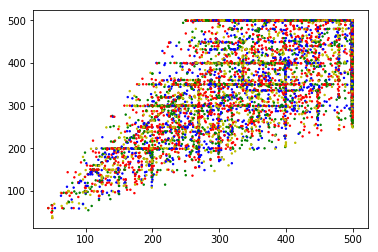

In [6]:
 #输出test文件夹图片尺寸散点
import matplotlib.pyplot as plt       
from matplotlib.font_manager import FontProperties
from keras.preprocessing import image
import os

dirs = os.listdir('./test')
x=[]
y=[]
n=0
for i in dirs:
    '''#测试用
    if n>5:
        break
        '''
    all_path=os.path.join('./test',i)
    img = image.load_img(all_path)   
    img= image.img_to_array(img)
    x.append(img.shape[0])
    y.append(img.shape[1])
    '''#测试用
    print(x)
    print(y)
    n+=1
    '''
cValue = ['r','y','g','b','r','y','g','b','r']
plt.scatter(x,y,c=cValue, s=2)
plt.show()
 

In [3]:
'''
from keras.models import *
from keras.applications import *
from keras.preprocessing import image
import numpy as np

model = Xception(weights='imagenet')

img_path = './trainS/cat/cat.8.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
'''

91889664/91884032 [==============================] - 2532s 28us/step
Predicted: [('n03657121', 'lens_cap', 0.696863), ('n03032252', 'cinema', 0.2654495), ('n04069434', 'reflex_camera', 0.022388792)]


In [49]:
from keras.models import *
from keras.applications import *
from keras.preprocessing import image
import numpy as np
from keras.applications.xception import preprocess_input, decode_predictions
import matplotlib.pyplot as plt       
from matplotlib.font_manager import FontProperties
import os
import cv2

model = Xception(weights='imagenet')
dirs = os.listdir('./trainS/cat')
wrong=[]
count=0
list_cat=['n02123045','n02123159','n02123394','n02123597'
,'n02124075','n02125311','n02127052']
top_n=50

for i in dirs:
    if count>12500:
        break
    img_path=os.path.join('./trainS/cat',i)
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
    #print('Predicted:', decode_predictions(preds, top=3)[0])
    count+=1
    
    lists=[]
    list0=decode_predictions(preds, top=top_n)[0]
    #print(list0)
    for n in range(top_n):
        list00=list(list0[n])
        lists.append(list00)
    #each_pre.append(img_path)
    #print(lists)
    test=1
    for n in range(top_n):
        test=(test)and(not(lists[n][0] in list_cat ))
    if test:#(not('cat' in lists[0][1]))and(not('cat' in lists[1][1]))and(not('cat' in lists[2][1])):
        #print(temp)
        lists.append(img_path)
        wrong.append(lists)
        #img01 = cv2.imread(img_path)
        #plt.imshow(img01)
#print(wrong,end='\n')    
print(len(wrong))

99


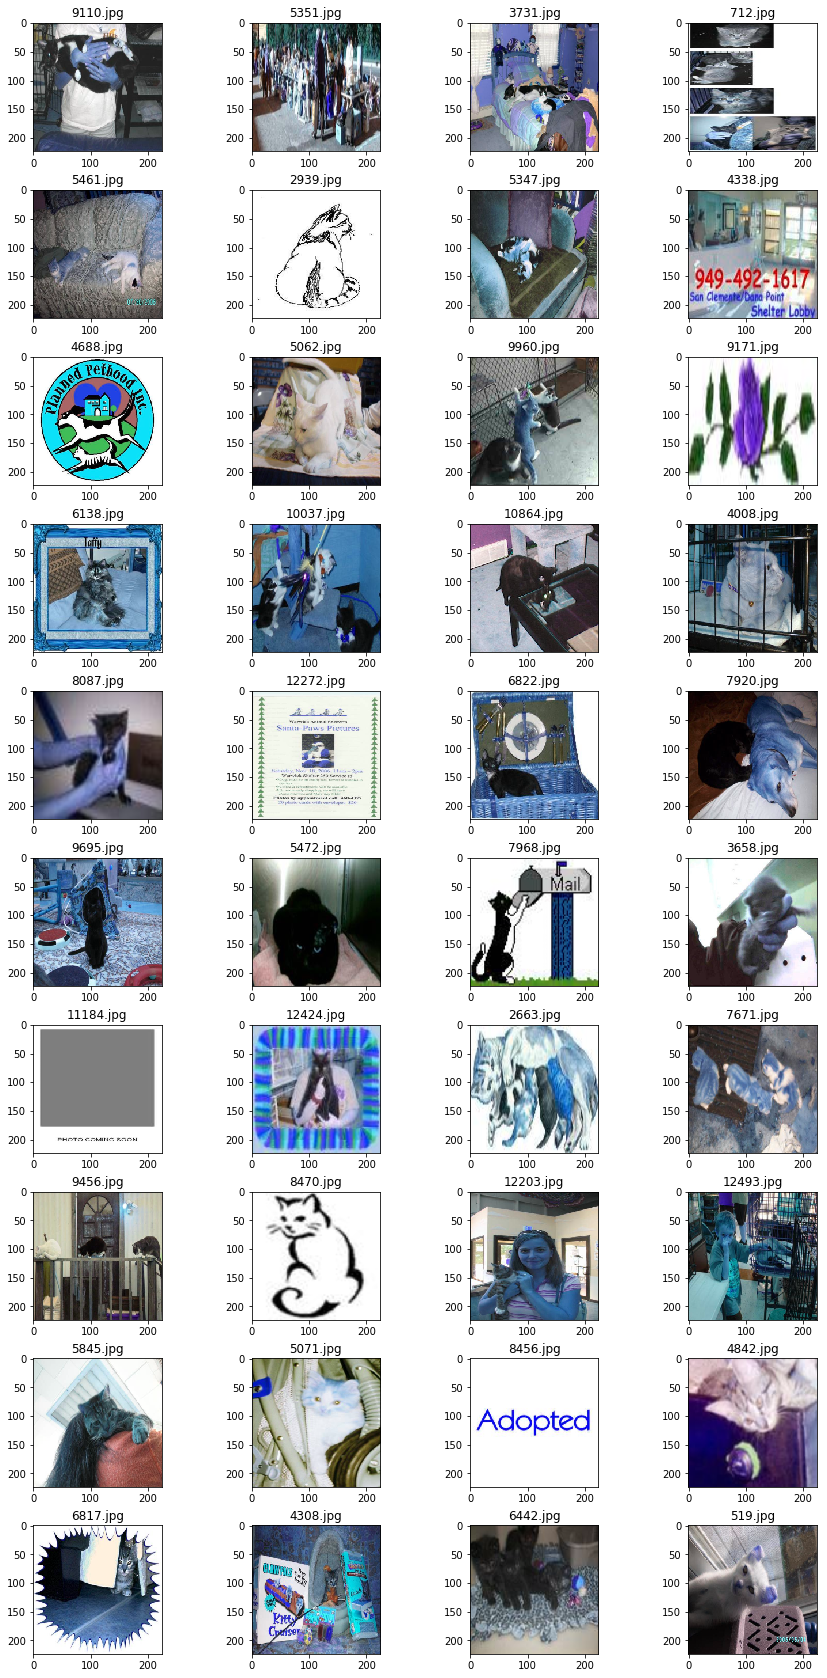

In [50]:
#部分异常图片
plt.figure(figsize = (15, 30))
for i in range(40):
    
    plt.subplot(10, 4, i+1)
    plt.subplots_adjust(left=None, hspace = 0.3)
    add=wrong[i][-1]
    img01 = cv2.imread(add)
    img01 = cv2.resize(img01, (224, 224))
    
    plt.title(add[17:])
    plt.imshow(img01)

In [16]:
list_dog=['n02085620','n02085782','n02085936','n02086079'
,'n02086240','n02086646','n02086910','n02087046'
,'n02087394','n02088094','n02088238','n02088364'
,'n02088466','n02088632','n02089078','n02089867'
,'n02089973','n02090379','n02090622','n02090721'
,'n02091032','n02091134','n02091244','n02091467'
,'n02091635','n02091831','n02092002','n02092339'
,'n02093256','n02093428','n02093647','n02093754'
,'n02093859','n02093991','n02094114','n02094258'
,'n02094433','n02095314','n02095570','n02095889'
,'n02096051','n02096177','n02096294','n02096437'
,'n02096585','n02097047','n02097130','n02097209'
,'n02097298','n02097474','n02097658','n02098105'
,'n02098286','n02098413','n02099267','n02099429'
,'n02099601','n02099712','n02099849','n02100236'
,'n02100583','n02100735','n02100877','n02101006'
,'n02101388','n02101556','n02102040','n02102177'
,'n02102318','n02102480','n02102973','n02104029'
,'n02104365','n02105056','n02105162','n02105251'
,'n02105412','n02105505','n02105641','n02105855'
,'n02106030','n02106166','n02106382','n02106550'
,'n02106662','n02107142','n02107312','n02107574'
,'n02107683','n02107908','n02108000','n02108089'
,'n02108422','n02108551','n02108915','n02109047'
,'n02109525','n02109961','n02110063','n02110185'
,'n02110341','n02110627','n02110806','n02110958'
,'n02111129','n02111277','n02111500','n02111889'
,'n02112018','n02112137','n02112350','n02112706'
,'n02113023','n02113186','n02113624','n02113712'
,'n02113799','n02113978']

top_n=20
dirs = os.listdir('./trainS/dog')
wrong_dog=[]
count=0


    
for i in dirs:
    if count>12500:
        break
    img_path=os.path.join('./trainS/dog',i)
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
    #print('Predicted:', decode_predictions(preds, top=3)[0])
    count+=1
    lists=[]
    list0=decode_predictions(preds, top=top_n)[0]
    #print(list0)
    for n in range(top_n):
        list00=list(list0[n])
        lists.append(list00)
    #each_pre.append(img_path)
    #print(lists)
    test=1
    for n in range(top_n):
        test=(test)and(not(lists[n][0] in list_dog ))
    if test:#(not('cat' in lists[0][1]))and(not('cat' in lists[1][1]))and(not('cat' in lists[2][1])):
        #print(temp)
        lists.append(img_path)
        wrong_dog.append(lists)
        #img01 = cv2.imread(img_path)
        #plt.imshow(img01)
#print(wrong,end='\n')     
print(len(wrong_dog))

49


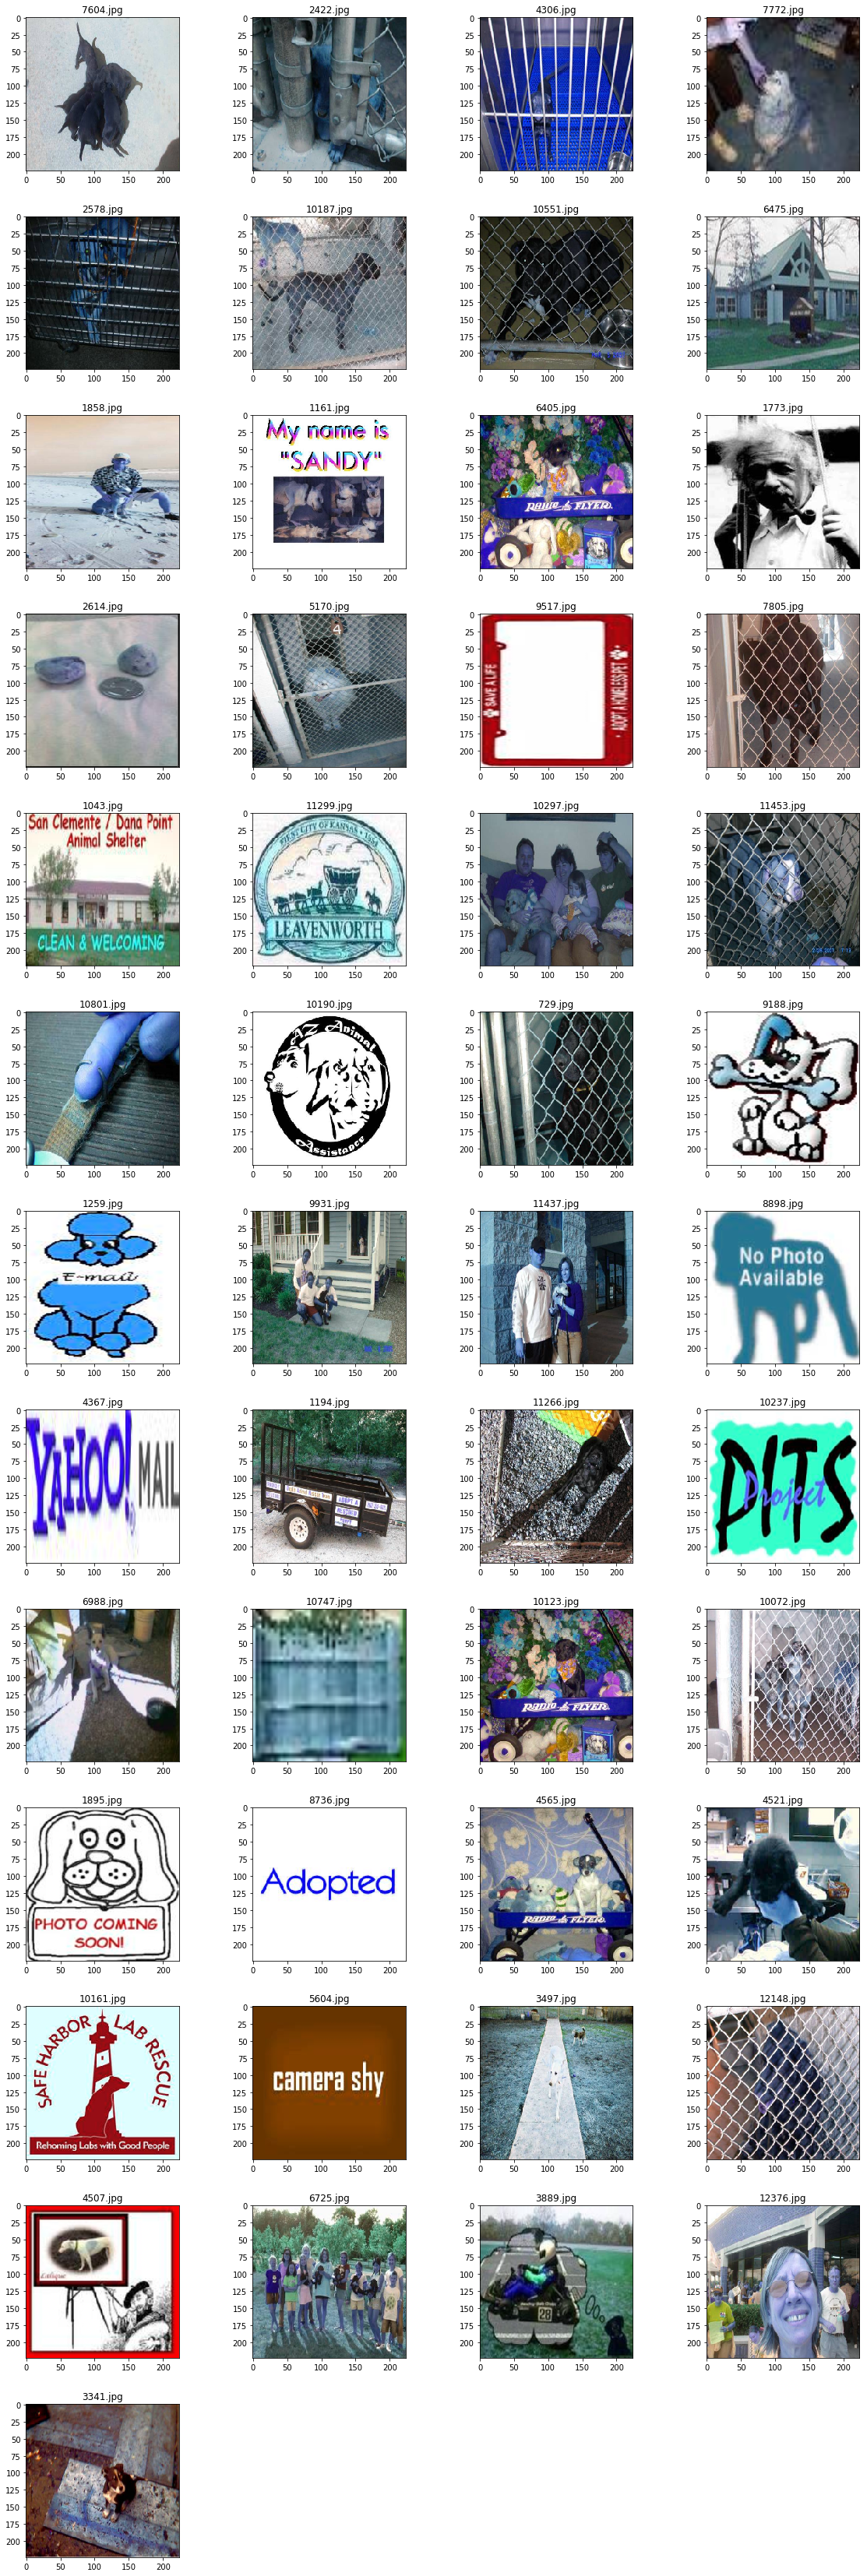

In [51]:
plt.figure(figsize = (20, 60))
for i in range(49):
    
    plt.subplot(13, 4, i+1)
    plt.subplots_adjust(left=None, hspace = 0.3)
    add=wrong_dog[i][-1]
    img02 = cv2.imread(add)
    img02 = cv2.resize(img02, (224, 224))
    
    plt.title(add[17:])
    plt.imshow(img02)